In [14]:
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager

# List of places (cities) you want to visualize
places = [
    "Maui, Hawaii, USA",
    "Oahu, Hawaii, USA",
    "Kauai, Hawaii, USA",
    "Big Island, Hawaii, USA",
]

# Define color palette pairs
color_palette_actual = [
    ('#f4f1de', '#e07a5f'),  # Cream and TerraCotta
    ('#ff0f7b', '#f89b29'),  # DeepPink and Coral
    ('#60efff', '#0061ff')   # SkyBlue and RoyalBlue
]


# Extend with additional colors if necessary
additional_colors = [
    ('#45caff', '#ff1b6b'),  # LightBlue and VividPink
    ('#07f49e', '#42047e'),  # MintGreen and DarkPurple
    ('#9bafd9', '#103783'),  # LightSteelBlue and NavyBlue
    ('#95f9c3', '#0b3866'),  # LightGreen and DarkTeal
    ('#613232', '#ffc8c8'),  # DarkBrown and LightPink
    ('#f8acff', '#696eff'),  # PalePink and Periwinkle
    ('#6ff7e8', '#1f7ea1'),  # Aquamarine and Teal
    ('#00f59b', '#7014f2'),  # ElectricGreen and ElectricPurple
    ('#faf0ca', '#0d3b66')   # LightCream and DarkBlue
]


Available fonts:  ['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Abolition', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'Alegreya', 'Alegreya', 'Alegreya', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sang

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/4243408786.py:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


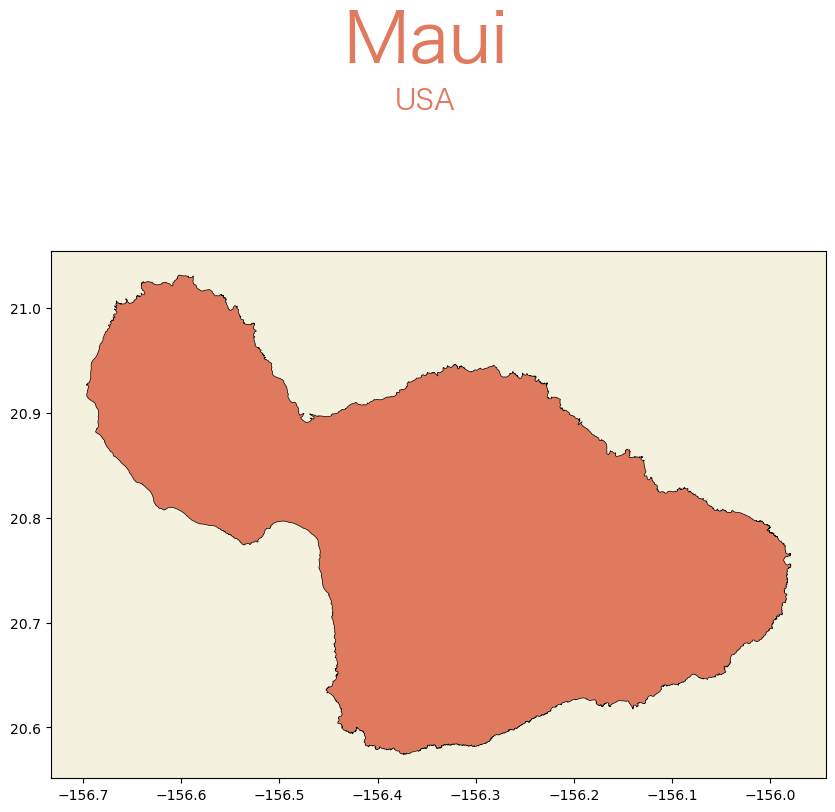

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/4243408786.py:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


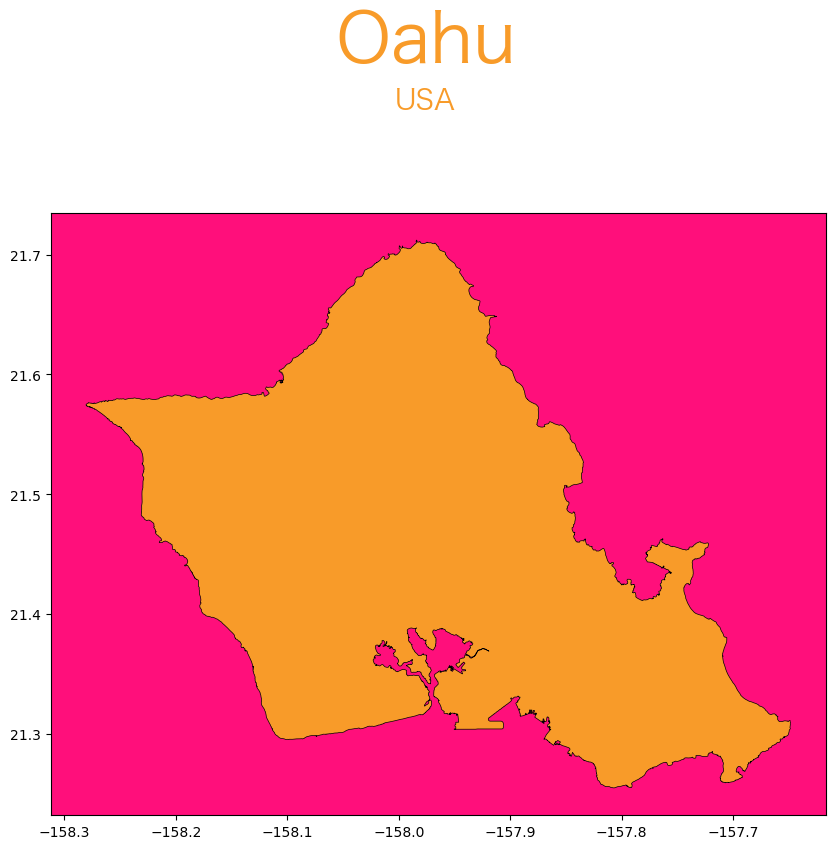

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/4243408786.py:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


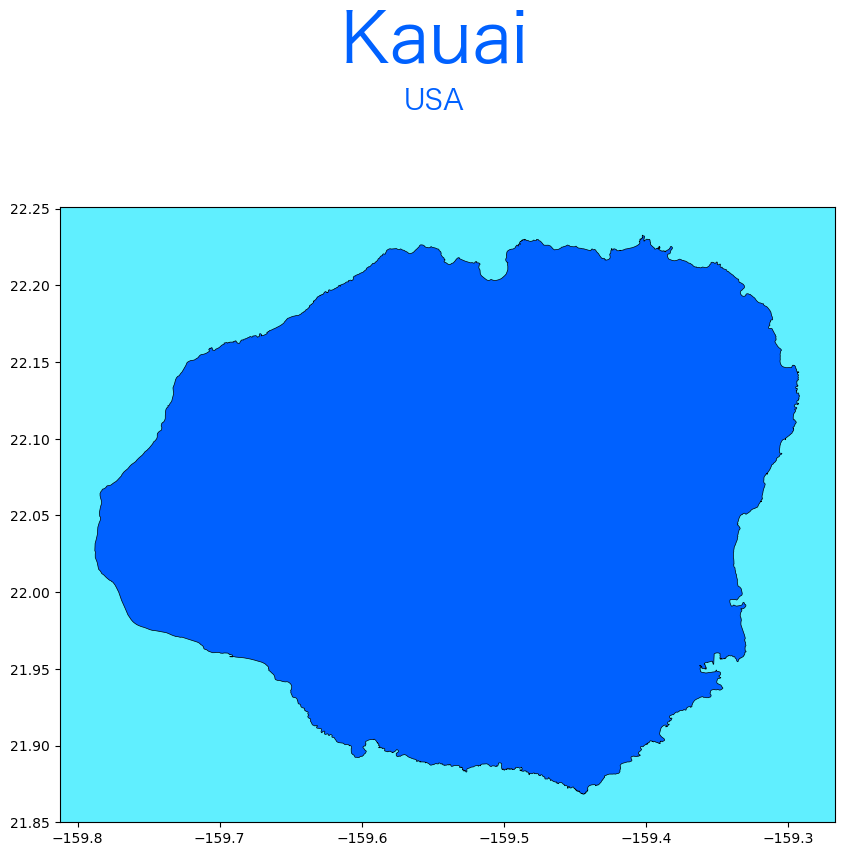

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/4243408786.py:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


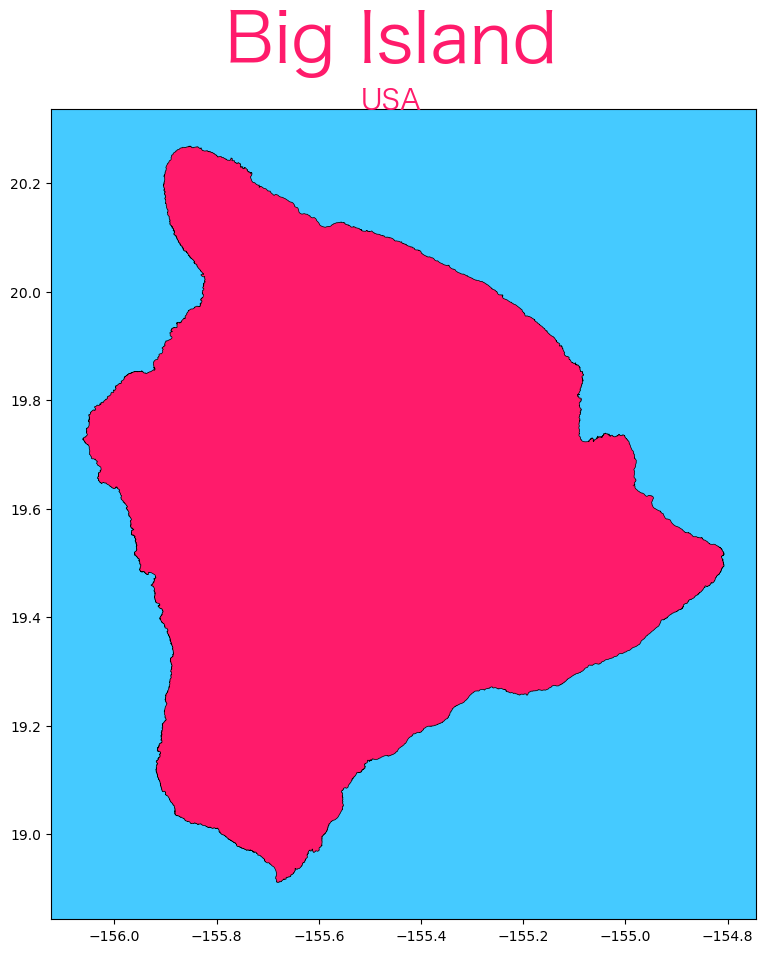

In [24]:
# Combine the colors to make 12 pairs
color_palette_actual.extend(additional_colors[:len(places) - len(color_palette_actual)])

# Check available fonts
available_fonts = sorted([f.name for f in fontManager.ttflist])
print("Available fonts: ", available_fonts)

# Set the font properties (use a different font if Nanum Gothic is not available)
font_properties_city = FontProperties(family='.aqua kana', size=50)  # Font for city name
font_properties_country = FontProperties(family='.aqua kana', size=20)  # Font for country name

for i, place_name in enumerate(places):
    # Split the place name into city and country
    city, state, country = place_name.split(', ')
    title_text = f"{city}\n{country}"

    # Download the geometries data for the place
   # gdf = ox.geometries_from_place(place_name, tags={'place': True})

    # Use the `geometries_from_place` function to get the geometries of the island
    tags = {'place': ['island', 'islet']}
    gdf = ox.geometries_from_place(place_name, tags=tags)


    # Select a color pair (cycling through the list)
    background_color, edge_color = color_palette_actual[i % len(color_palette_actual)]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(top=0.92)  # Adjust to create space at the top

    # Plot the geometries on the axis with the background color
    ax.set_facecolor(background_color)
    gdf.plot(ax=ax, facecolor=edge_color, edgecolor='k', linewidth=0.5)

    # Add the city and country name above the visualization
    fig.suptitle(city, fontsize=50, fontproperties=font_properties_city, color=edge_color, ha='center', y=1.02)
    fig.text(0.5, 0.92, country, fontsize=20, fontproperties=font_properties_country, color=edge_color, ha='center')

    # Save the plot to a file
    filename = f'hawaii_shapes_{place_name.replace(", ", "_").replace(" ", "_")}_V01.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


Available fonts:  ['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Abolition', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'Alegreya', 'Alegreya', 'Alegreya', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sang

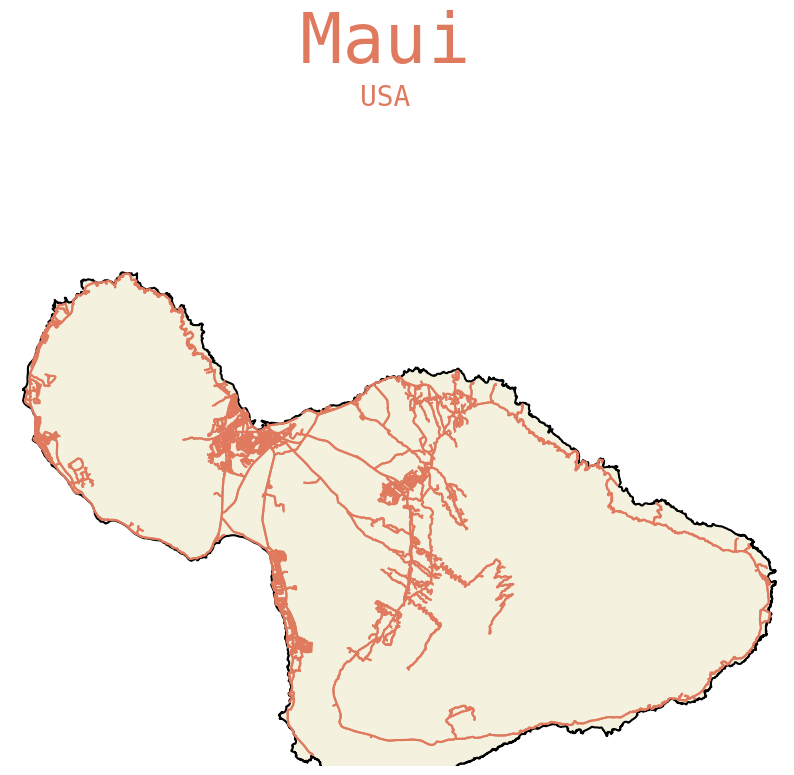

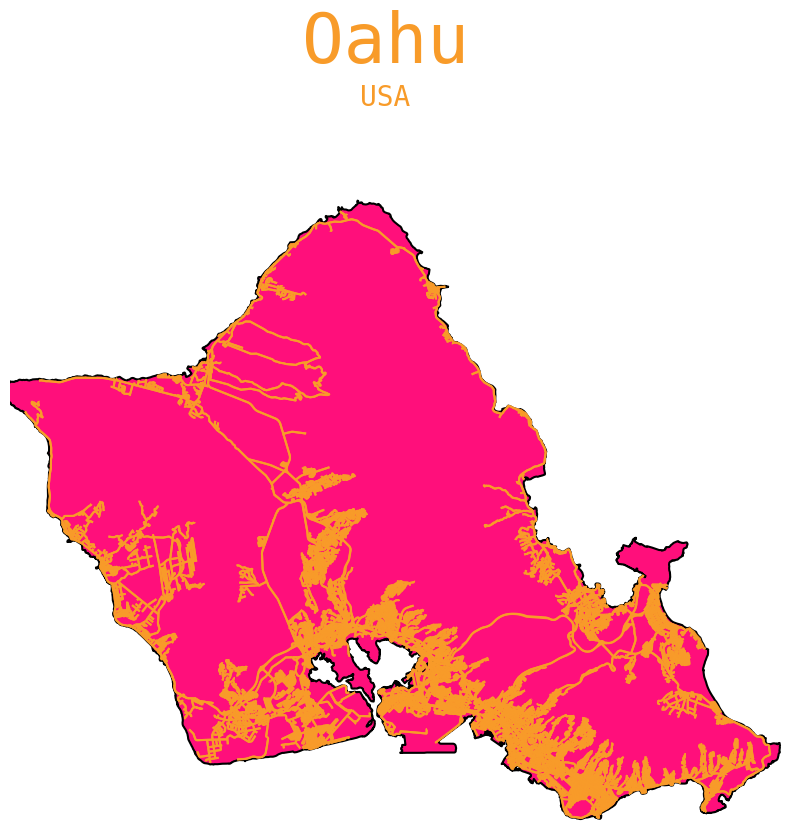

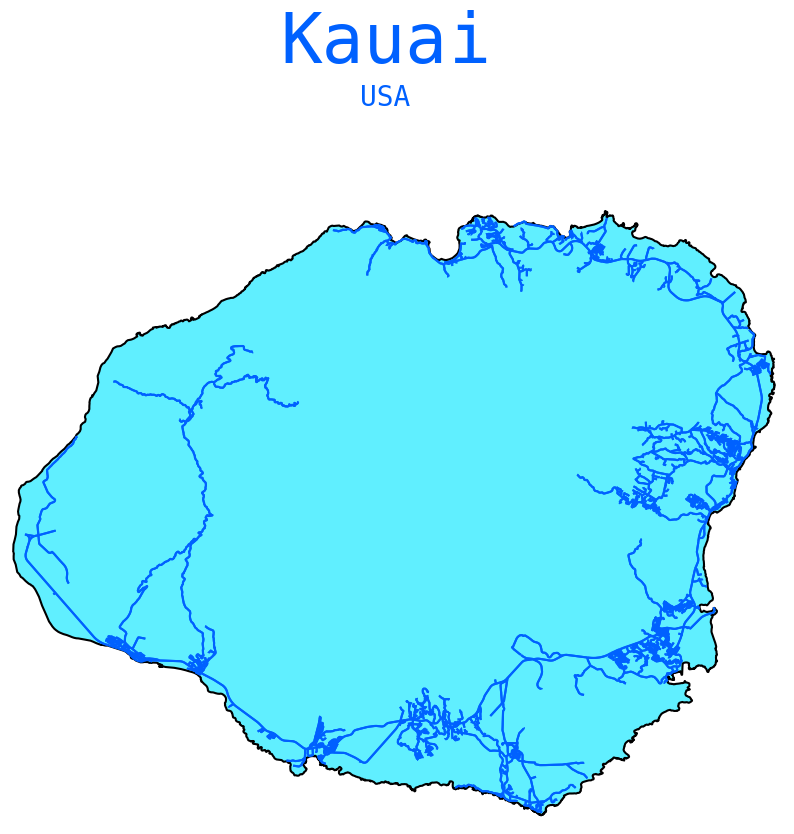

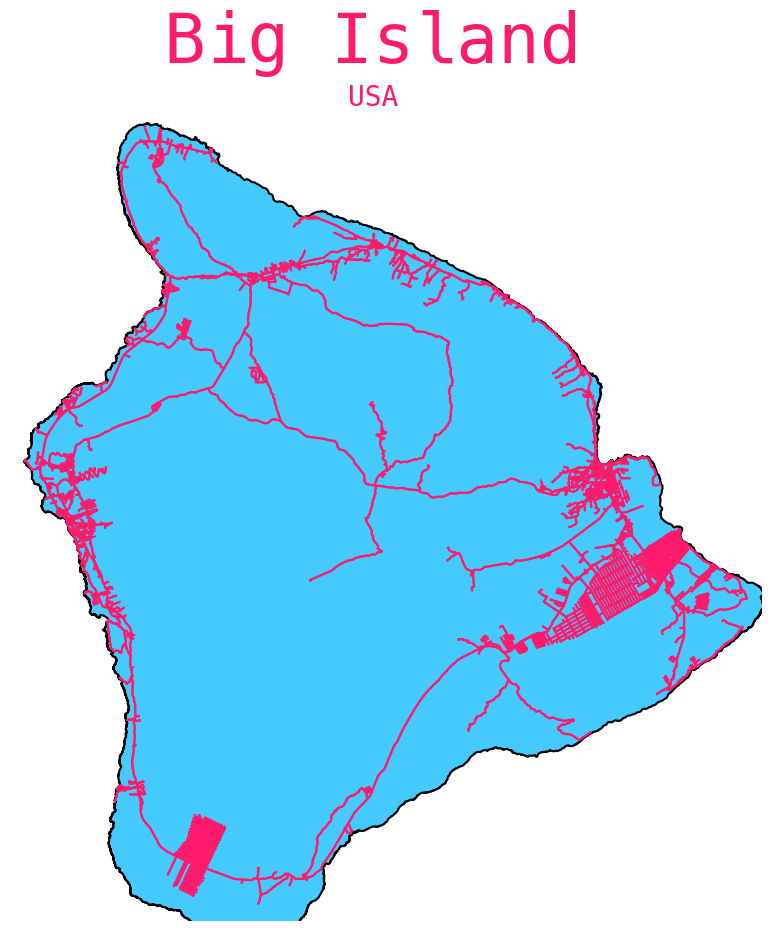

In [25]:
# Combine the colors to make 12 pairs
color_palette_actual.extend(additional_colors[:len(places) - len(color_palette_actual)])

# Check available fonts
available_fonts = sorted([f.name for f in fontManager.ttflist])
print("Available fonts: ", available_fonts)

# Set the font properties (use a different font if Nanum Gothic is not available)
font_properties_city = FontProperties(family='Menlo', size=50)  # Font for city name
font_properties_country = FontProperties(family='Menlo', size=20)  # Font for country name

for i, place_name in enumerate(places):
    # Split the place name into city, state, and country
    city, state, country = place_name.split(', ')
    title_text = f"{city}\n{country}"

    # Use the `geocode_to_gdf` function to get the geometries of the place
    gdf = ox.geocode_to_gdf(place_name)
    
    # Download the street network data for the place
    graph = ox.graph_from_place(place_name, network_type='drive') # walk bike

    # Select a color pair (cycling through the list)
    background_color, edge_color = color_palette_actual[i % len(color_palette_actual)]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(top=0.92)  # Adjust to create space at the top

    # Plot the geometries on the axis with the background color
    ax.set_facecolor('white')
    gdf.plot(ax=ax, facecolor=background_color, edgecolor='black', linewidth=1.5)
    
    # Plot the street network on the same axis
    ox.plot_graph(graph, ax=ax, node_size=0, edge_color=edge_color, edge_linewidth=1.5, show=False, close=False)

    # Add the city and country name above the visualization
    fig.suptitle(city, fontsize=50, fontproperties=font_properties_city, color=edge_color, ha='center', y=1.02)
    fig.text(0.5, 0.924, country, fontsize=20, fontproperties=font_properties_country, color=edge_color, ha='center')

    # Save the plot to a file
    filename = f'hawaii_shapes_{place_name.replace(", ", "_").replace(" ", "_")}_V02.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

Available fonts:  ['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Abolition', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'Alegreya', 'Alegreya', 'Alegreya', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sang

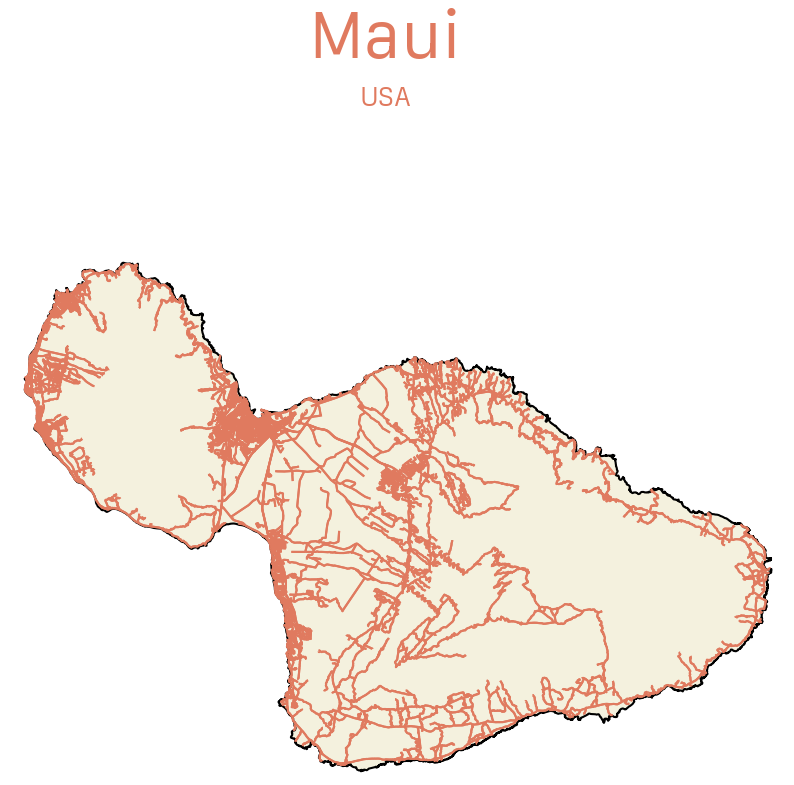

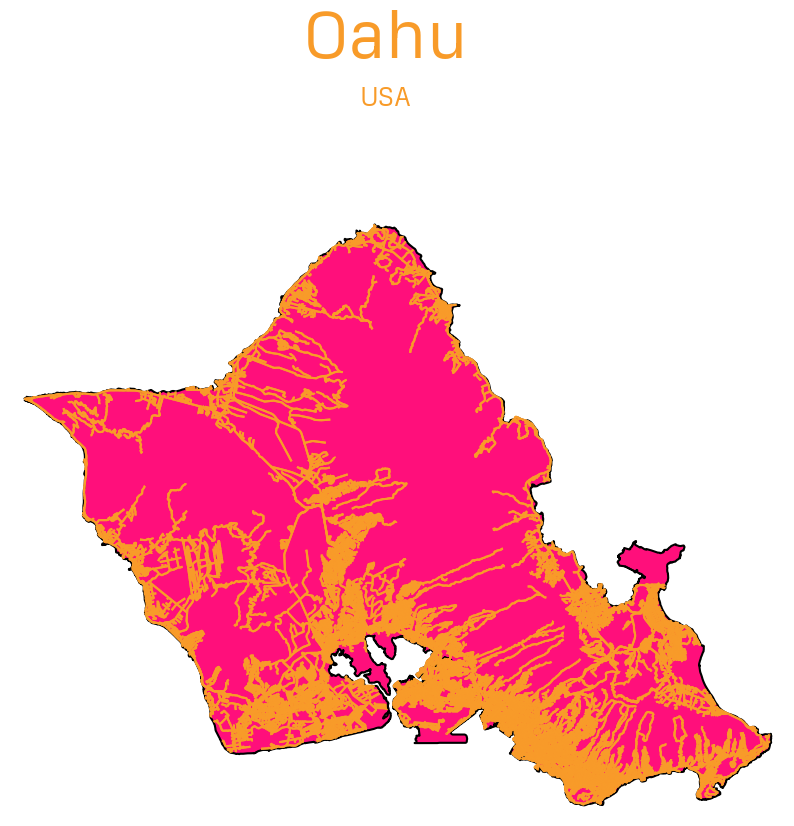

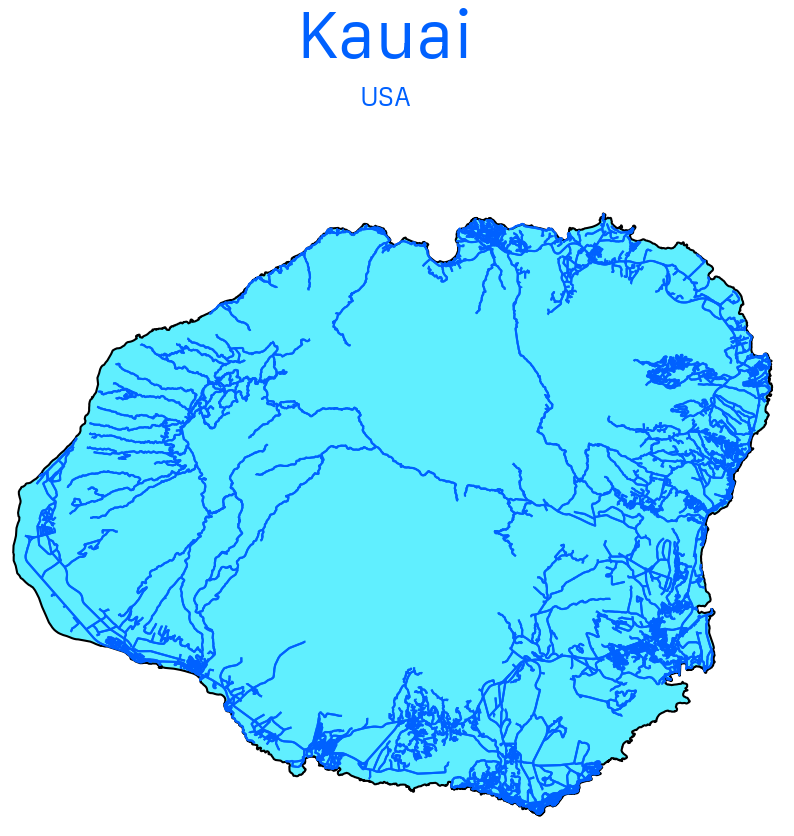

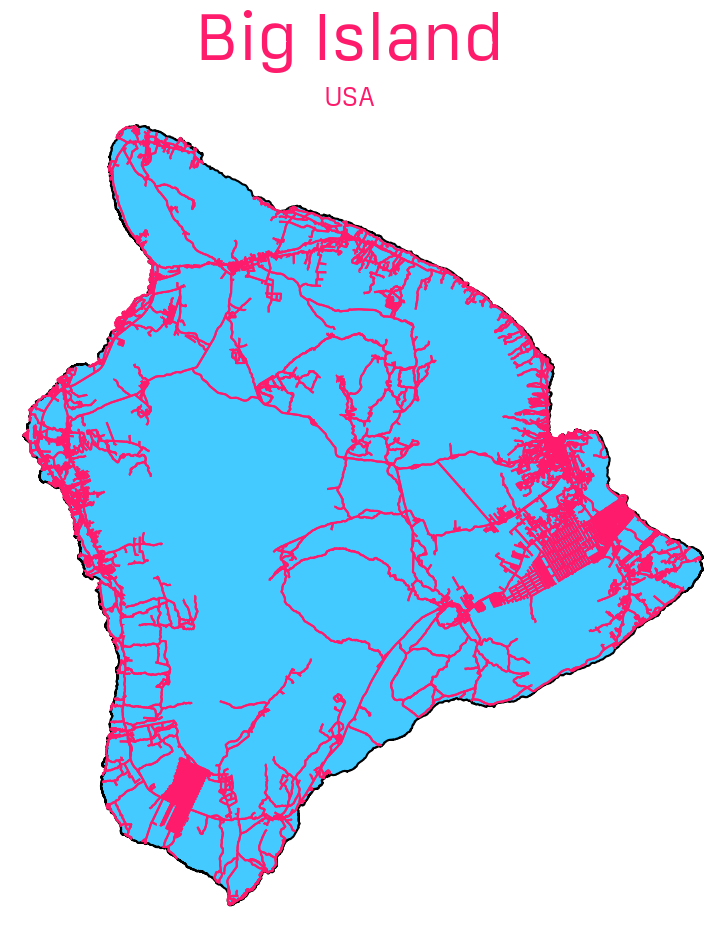

In [26]:
# Combine the colors to make 12 pairs
color_palette_actual.extend(additional_colors[:len(places) - len(color_palette_actual)])

# Check available fonts
available_fonts = sorted([f.name for f in fontManager.ttflist])
print("Available fonts: ", available_fonts)

# Set the font properties (use a different font if Nanum Gothic is not available)
font_properties_city = FontProperties(family='.SF Camera', size=50)  # Font for city name
font_properties_country = FontProperties(family='.SF Camera', size=20)  # Font for country name

for i, place_name in enumerate(places):
    # Split the place name into city, state, and country
    city, state, country = place_name.split(', ')
    title_text = f"{city}\n{country}"

    # Use the `geocode_to_gdf` function to get the geometries of the place
    gdf = ox.geocode_to_gdf(place_name)
    
    # Download the street network data for the place
    graph = ox.graph_from_place(place_name, network_type='walk') # drive bike

    # Select a color pair (cycling through the list)
    background_color, edge_color = color_palette_actual[i % len(color_palette_actual)]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(top=0.92)  # Adjust to create space at the top

    # Plot the geometries on the axis with the background color
    ax.set_facecolor('white')
    gdf.plot(ax=ax, facecolor=background_color, edgecolor='black', linewidth=1.5)
    
    # Plot the street network on the same axis
    ox.plot_graph(graph, ax=ax, node_size=0, edge_color=edge_color, edge_linewidth=1.5, show=False, close=False)

    # Add the city and country name above the visualization
    fig.suptitle(city, fontsize=50, fontproperties=font_properties_city, color=edge_color, ha='center', y=1.02)
    fig.text(0.5, 0.924, country, fontsize=20, fontproperties=font_properties_country, color=edge_color, ha='center')

    # Save the plot to a file
    filename = f'hawaii_shapes_{place_name.replace(", ", "_").replace(" ", "_")}_V03_walk.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

Available fonts:  ['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Abolition', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'Alegreya', 'Alegreya', 'Alegreya', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sang

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/3619580088.py:19: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


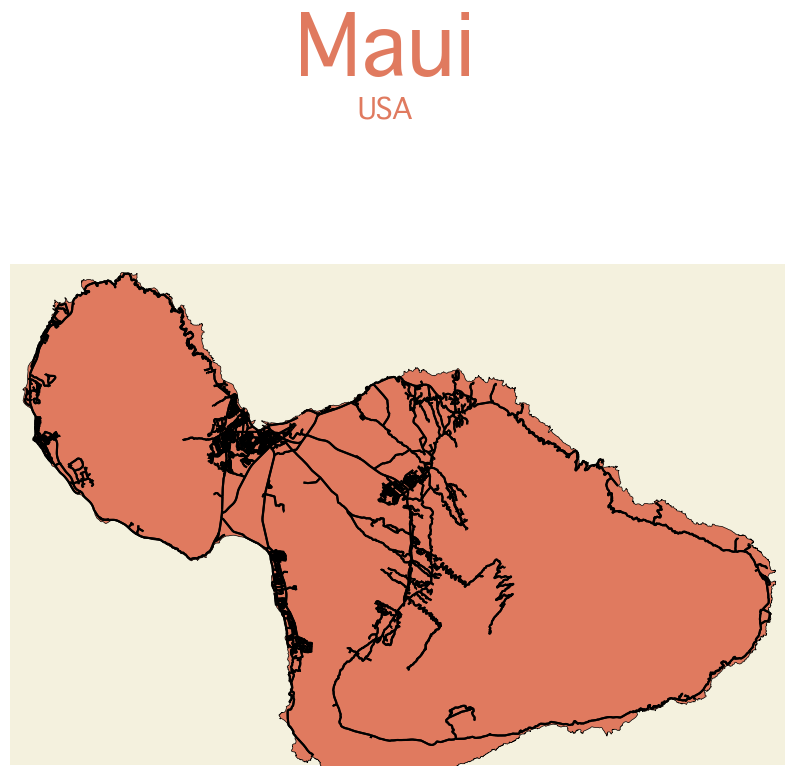

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/3619580088.py:19: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


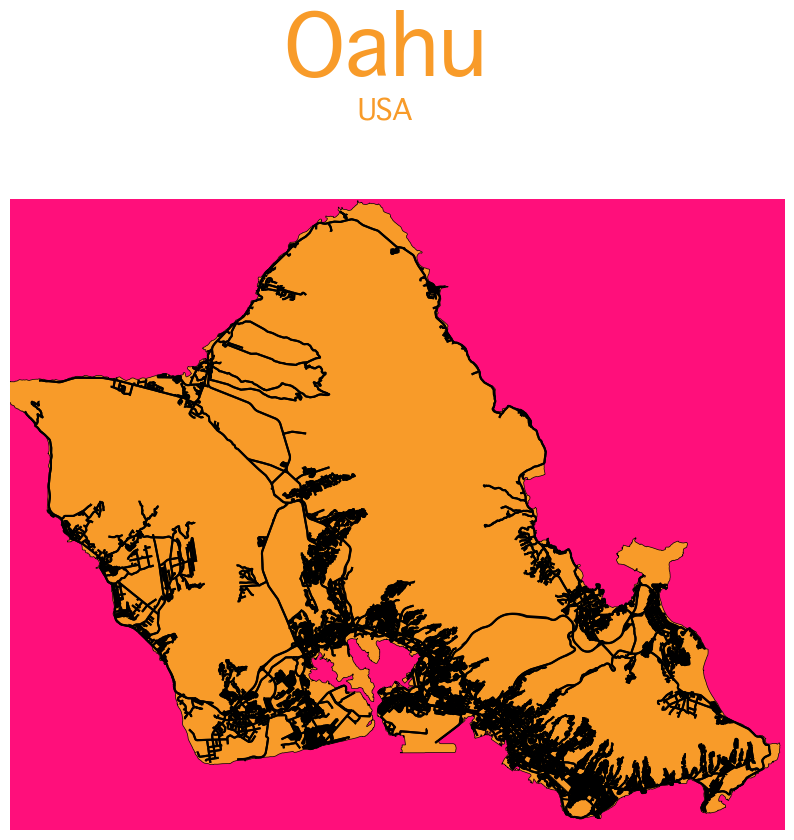

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/3619580088.py:19: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


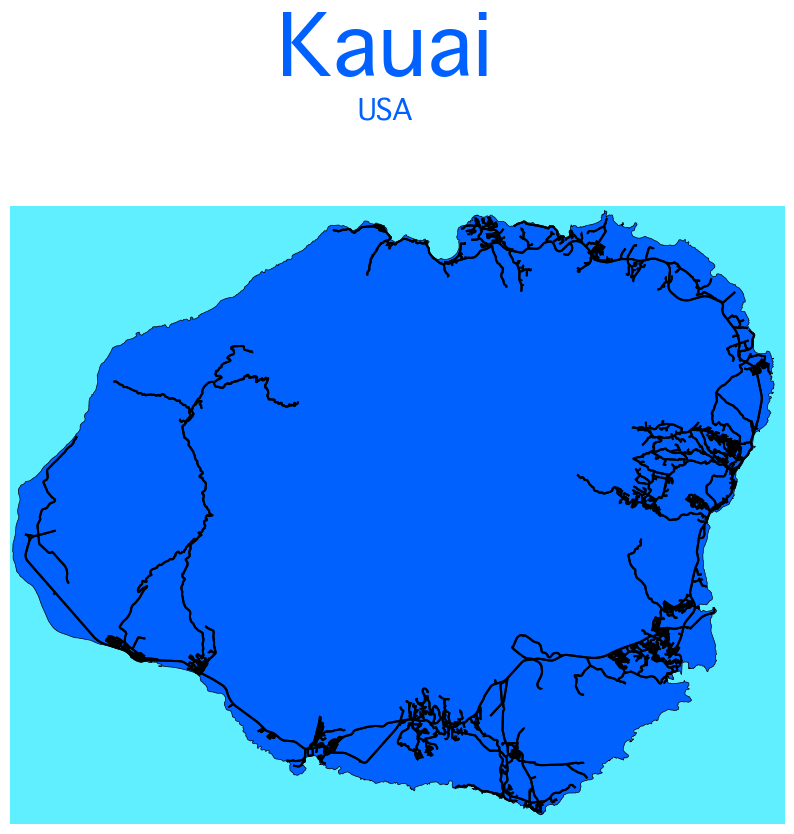

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_32587/3619580088.py:19: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags=tags)


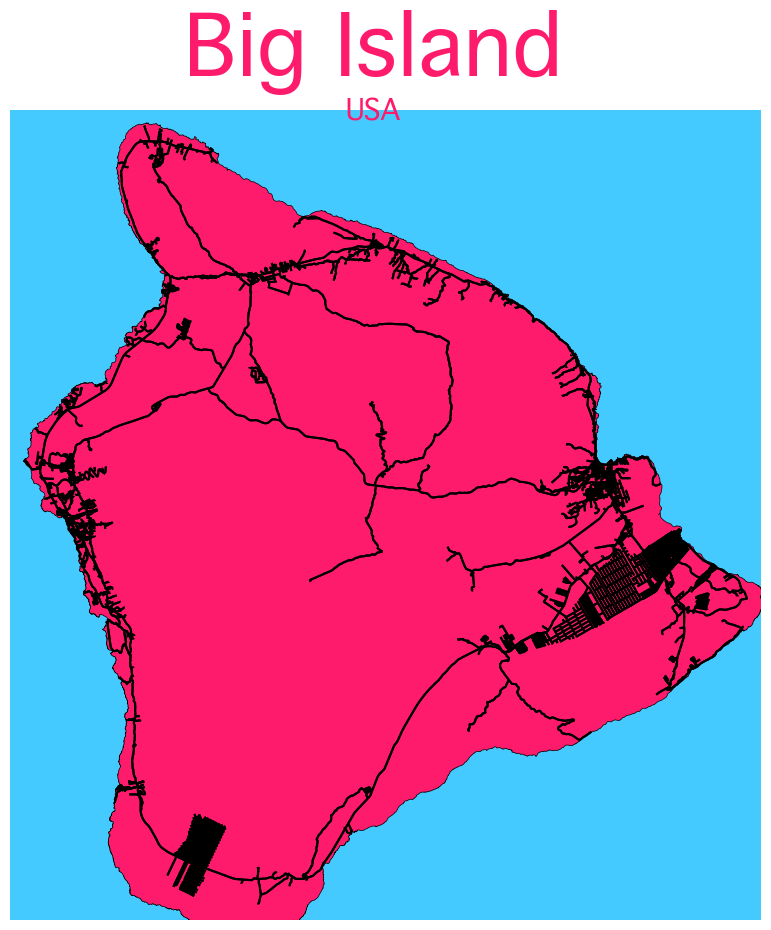

In [23]:
# Combine the colors to make 12 pairs
color_palette_actual.extend(additional_colors[:len(places) - len(color_palette_actual)])

# Check available fonts
available_fonts = sorted([f.name for f in fontManager.ttflist])
print("Available fonts: ", available_fonts)

# Set the font properties (use a different font if Nanum Gothic is not available)
font_properties_city = FontProperties(family='Geneva', size=80)  # Font for city name
font_properties_country = FontProperties(family='Geneva', size=20)  # Font for country name

for i, place_name in enumerate(places):
    # Split the place name into city, state, and country
    city, state, country = place_name.split(', ')
    title_text = f"{city}\n{country}"

    # Use the `geometries_from_place` function to get the geometries of the island
    tags = {'place': ['island', 'islet']}
    gdf = ox.geometries_from_place(place_name, tags=tags)

    # Download the street network data for the place
    graph = ox.graph_from_place(place_name, network_type='drive')

    # Select a color pair (cycling through the list)
    background_color, edge_color = color_palette_actual[i % len(color_palette_actual)]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(top=0.92)  # Adjust to create space at the top

    # Plot the geometries on the axis with the background color
    ax.set_facecolor(background_color)
    gdf.plot(ax=ax, facecolor=edge_color, edgecolor='k', linewidth=0.5)

    # Plot the street network on the same axis
    ox.plot_graph(graph, ax=ax, node_size=0, edge_color='black', edge_linewidth=1.5, show=False, close=False)

    # Add the city and country name above the visualization
    fig.suptitle(city, fontsize=60, fontproperties=font_properties_city, color=edge_color, ha='center', y=1.02)
    fig.text(0.5, 0.91, country, fontsize=20, fontproperties=font_properties_country, color=edge_color, ha='center')

    # Save the plot to a file
    filename = f'hawaii_shapes_{place_name.replace(", ", "_").replace(" ", "_")}_V04_walk.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()